# Load Data

In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

# load iris_train.data and iris_test.data
pd_train = pd.read_csv("iris/iris_train.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])
pd_test = pd.read_csv("iris/iris_test.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])

# parse the features and labels as numpy arrays.
X_train = pd_train.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_train = pd_train.as_matrix(columns=["label"]).ravel()
X_test = pd_test.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_test = pd_test.as_matrix(columns=["label"]).ravel()

# Encode labels
le = preprocessing.LabelEncoder()
le.fit(y_train)
print(le.classes_)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

['Iris-setosa' 'Iris-versicolor']


In [2]:
saved_y_train = copy.deepcopy(y_train)
saved_y_test = copy.deepcopy(y_test)

# Pre-Analysis Dataset

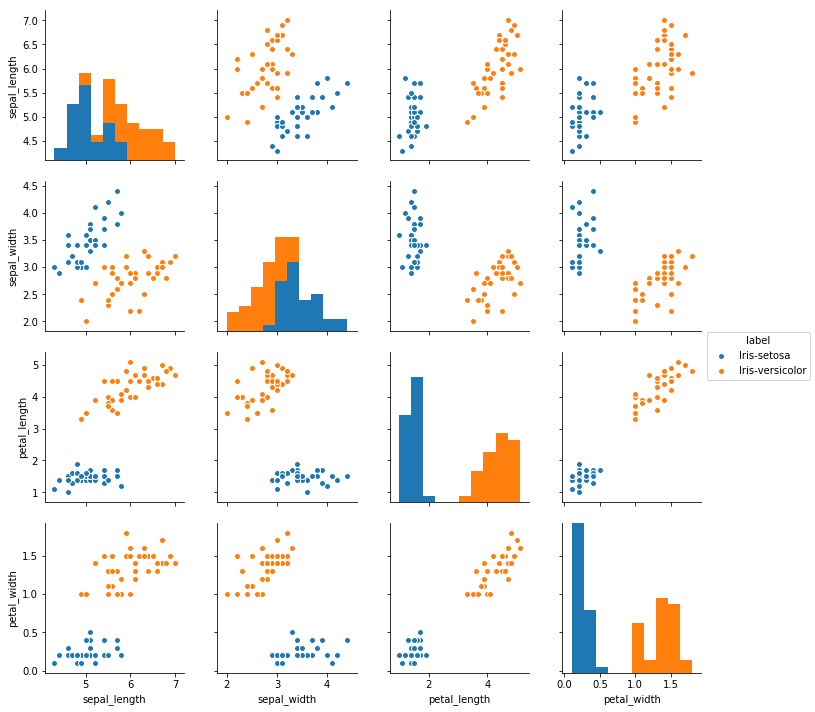

In [3]:
from seaborn import pairplot
pairplot(pd_train,hue="label")

# Training Programming

In [4]:
MAX_ITERATION = 100000
LEARNING_RATE = 1e-3

In [5]:
np.random.seed(233)

W = np.random.random((1,4))
b = np.random.random(1)
y_train = (copy.deepcopy(saved_y_train) - 0.5)*2
y_test = (copy.deepcopy(saved_y_test) - 0.5)*2
train_accuracy_list = []
test_accuracy_list = []

for count in range(MAX_ITERATION):
    #Check Accuracy
    train_correct = np.sum(np.sign(X_train.dot(W.T) + b) == y_train.reshape(len(X_train),1))
    test_correct = np.sum(np.sign(X_test.dot(W.T) + b) == y_test.reshape(len(X_test),1))
    train_accuracy_list.append(train_correct/len(X_train))
    test_accuracy_list.append(test_correct/len(X_test))
    print("Epoch = "+str(count)+"\tTrain Accuracy = "+
        str(train_correct/len(X_train))+"\tTest Accuracy = "+
        str(test_correct/len(X_test)))
    if train_correct == len(X_train): break
    #Train
    random_id = np.random.randint(0,len(X_train))
    X_tmp = X_train[random_id]
    y_tmp = y_train[random_id]
    prediction =  X_tmp.dot(W.T) + b
    pred_label = 1 if (prediction>=0) else -1
    if prediction!=y_tmp:
        W += LEARNING_RATE*(y_tmp-pred_label)*X_tmp
        b += LEARNING_RATE*(y_tmp-pred_label)

Epoch = 0	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 1	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 2	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 3	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 4	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 5	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 6	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 7	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 8	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 9	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 10	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 11	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 12	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 13	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 14	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 15	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 16	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 17	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 18	Train Accuracy = 0.5	Test Accuracy = 0.5
Epoch = 19	Train Accur

# Plot

In [6]:
train_error = [1-a for a in train_accuracy_list]
test_error = [1-a for a in test_accuracy_list]

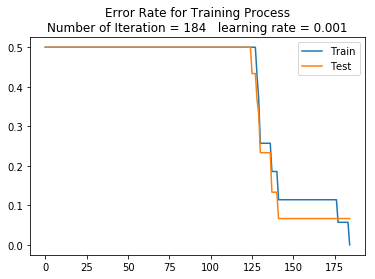

In [7]:
plt.plot(train_error)
plt.plot(test_error)
plt.title("Error Rate for Training Process\nNumber of Iteration = "+
          str(count)+"   learning rate = "+str(LEARNING_RATE))
plt.legend(["Train","Test"])
plt.show()

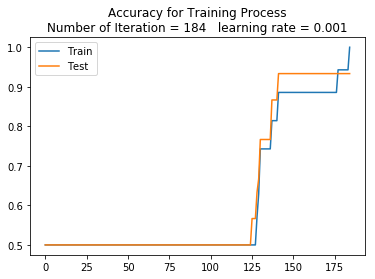

In [8]:
plt.plot(train_accuracy_list)
plt.plot(test_accuracy_list)
plt.title("Accuracy for Training Process\nNumber of Iteration = "+
          str(count)+"   learning rate = "+str(LEARNING_RATE))
plt.legend(["Train","Test"])
plt.show()

In [9]:
W

array([[-0.54073087,  0.4174156 ,  0.38216564,  0.86654018]])

In [10]:
b

array([0.21290549])

In [11]:
TP = 0
FP = 0
TN = 0
FN = 0
for pred, label in  zip(np.sign(X_test.dot(W.T) + b),y_test):
    if pred==1 and label==1: TP+=1
    if pred==1 and label==-1: FP+=1
    if pred==-1 and label==-1: TN+=1
    if pred==-1 and label==1: FN+=1

Accuracy = (TP+TN)/(TP+FP+TN+FN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_value = (2*Precision*Recall) / (Precision+Recall)
print("Accuracy = "+str(Accuracy)+"\tPrecision = "+str(Precision)+
      "\nRecall = "+str(Recall)+"\tF_value = "+str(F_value))

Accuracy = 0.9333333333333333	Precision = 0.8823529411764706
Recall = 1.0	F_value = 0.9375


# Z-score

In [12]:
X_train_z_score = (X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0)
X_test_z_score = (X_test-np.mean(X_train,axis=0))/np.std(X_train,axis=0)
y_train_z_score = pd_train.as_matrix(columns=["label"])
y_test_z_score = pd_test.as_matrix(columns=["label"])

In [13]:
pd_train_z_score = pd.DataFrame(np.hstack((X_train_z_score,y_train_z_score.reshape(len(X_train),1))),columns=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])
pd_test_z_score = pd.DataFrame(np.hstack((X_test_z_score,y_test_z_score.reshape(len(X_test),1))),columns=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])

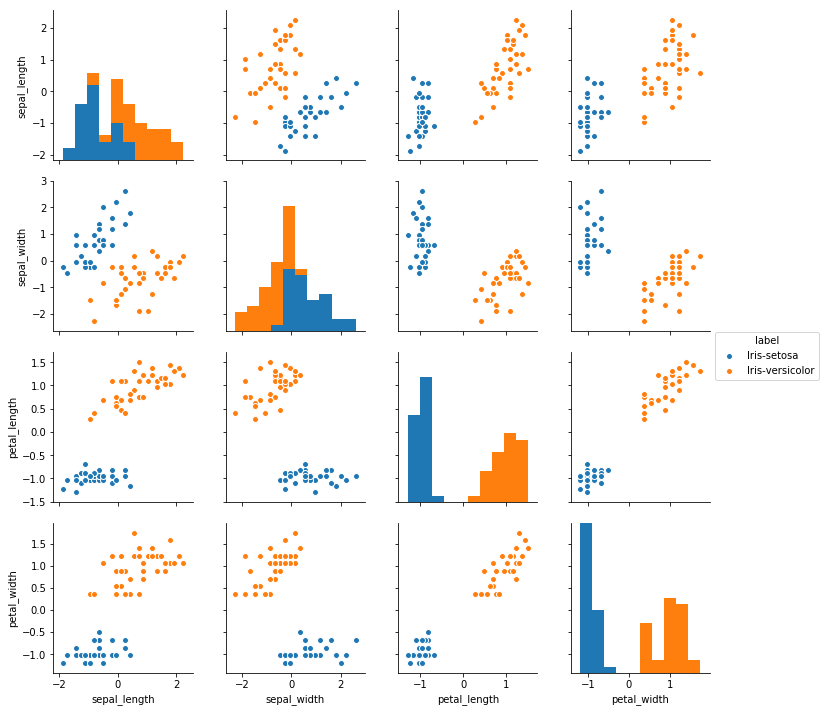

In [14]:
pairplot(pd_train_z_score,hue="label")

# Z-score Training

In [34]:
MAX_ITERATION = 100000
LEARNING_RATE = 1e-3

In [35]:
np.random.seed(233333)

W = np.random.random((1,4))
b = np.random.random(1)
y_train = (copy.deepcopy(saved_y_train) - 0.5)*2
y_test = (copy.deepcopy(saved_y_test) - 0.5)*2
train_accuracy_list = []
test_accuracy_list = []

for count in range(MAX_ITERATION):
    #Check Accuracy
    train_correct = np.sum(np.sign(X_train_z_score.dot(W.T) + b) == y_train.reshape(len(X_train_z_score),1))
    test_correct = np.sum(np.sign(X_test_z_score.dot(W.T) + b) == y_test.reshape(len(X_test_z_score),1))
    train_accuracy_list.append(train_correct/len(X_train_z_score))
    test_accuracy_list.append(test_correct/len(X_test_z_score))
    print("Epoch = "+str(count)+"\tTrain Accuracy = "+
        str(train_correct/len(X_train_z_score))+"\tTest Accuracy = "+
        str(test_correct/len(X_test_z_score)))
    if train_correct == len(X_train_z_score): break
    #Train
    random_id = np.random.randint(0,len(X_train_z_score))
    X_tmp = X_train_z_score[random_id]
    y_tmp = y_train[random_id]
    prediction =  X_tmp.dot(W.T) + b
    pred_label = 1 if (prediction>=0) else -1
    if prediction!=y_tmp:
        W += LEARNING_RATE*(y_tmp-pred_label)*X_tmp
        b += LEARNING_RATE*(y_tmp-pred_label)

Epoch = 0	Train Accuracy = 0.9571428571428572	Test Accuracy = 0.9666666666666667
Epoch = 1	Train Accuracy = 0.9571428571428572	Test Accuracy = 0.9666666666666667
Epoch = 2	Train Accuracy = 0.9571428571428572	Test Accuracy = 0.9666666666666667
Epoch = 3	Train Accuracy = 0.9571428571428572	Test Accuracy = 0.9666666666666667
Epoch = 4	Train Accuracy = 0.9571428571428572	Test Accuracy = 0.9666666666666667
Epoch = 5	Train Accuracy = 0.9571428571428572	Test Accuracy = 0.9666666666666667
Epoch = 6	Train Accuracy = 0.9571428571428572	Test Accuracy = 0.9666666666666667
Epoch = 7	Train Accuracy = 0.9571428571428572	Test Accuracy = 0.9666666666666667
Epoch = 8	Train Accuracy = 0.9571428571428572	Test Accuracy = 0.9666666666666667
Epoch = 9	Train Accuracy = 0.9571428571428572	Test Accuracy = 0.9666666666666667
Epoch = 10	Train Accuracy = 0.9571428571428572	Test Accuracy = 0.9666666666666667
Epoch = 11	Train Accuracy = 0.9571428571428572	Test Accuracy = 0.9666666666666667
Epoch = 12	Train Accuracy 

In [36]:
train_error = [1-a for a in train_accuracy_list]
test_error = [1-a for a in test_accuracy_list]

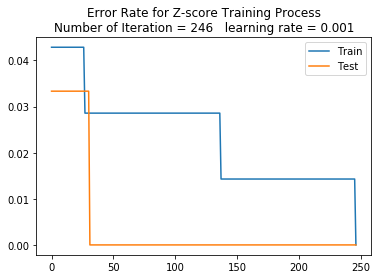

In [37]:
plt.plot(train_error)
plt.plot(test_error)
plt.title("Error Rate for Z-score Training Process\nNumber of Iteration = "+
          str(count)+"   learning rate = "+str(LEARNING_RATE))
plt.legend(["Train","Test"])
plt.show()

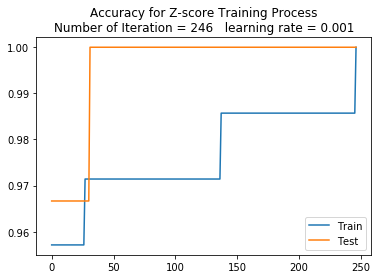

In [38]:
plt.plot(train_accuracy_list)
plt.plot(test_accuracy_list)
plt.title("Accuracy for Z-score Training Process\nNumber of Iteration = "+
          str(count)+"   learning rate = "+str(LEARNING_RATE))
plt.legend(["Train","Test"])
plt.show()

In [39]:
W

array([[0.30657108, 0.25808087, 0.6521715 , 0.70696151]])

In [40]:
b

array([0.31247015])

In [41]:
TP = 0
FP = 0
TN = 0
FN = 0
for pred, label in  zip(np.sign(X_test_z_score.dot(W.T) + b),y_test):
    if pred==1 and label==1: TP+=1
    if pred==1 and label==-1: FP+=1
    if pred==-1 and label==-1: TN+=1
    if pred==-1 and label==1: FN+=1

Accuracy = (TP+TN)/(TP+FP+TN+FN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_value = (2*Precision*Recall) / (Precision+Recall)
print("Accuracy = "+str(Accuracy)+"\tPrecision = "+str(Precision)+
      "\nRecall = "+str(Recall)+"\tF_value = "+str(F_value))

Accuracy = 1.0	Precision = 1.0
Recall = 1.0	F_value = 1.0
